##Data Description

The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.







##Attribute Information:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years





In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('haberman.csv')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [70]:
columns = ['age','operation_year','positive_nodes','survival_status']

df.columns = columns
df.head()

,age,operation_year,positive_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              305 non-null    int64
 1   operation_year   305 non-null    int64
 2   positive_nodes   305 non-null    int64
 3   survival_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


##Observations:

There are no missing values in this dataset. So there is no need to do data imputation.

The datatype of 'survival_status' column is integer. It has to be converted to categorical datatype.

The values of 'survival_status' column are not meanigful. Hence they are mapped to 'yes' (survived ) and 'no' (not survived )

In [4]:
df.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [72]:
print(list(df['survival_status'].unique()))

[1, 2]


In [74]:
# modify the target column values to be meaningful as well as categorical
df['survival_status'] = df['survival_status'].map({1:"yes", 2:"no"})
df['survival_status'] = df['survival_status'].astype('category')
print(df.head())

   age  operation_year  positive_nodes survival_status
0   30              62               3             yes
1   30              65               0             yes
2   31              59               2             yes
3   31              65               4             yes
4   33              58              10             yes


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              305 non-null    int64   
 1   operation_year   305 non-null    int64   
 2   positive_nodes   305 non-null    int64   
 3   survival_status  305 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [76]:
df.describe()

,age,operation_year,positive_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [77]:
print("Number of rows: " + str(df.shape[0]))
print("Number of columns: " + str(df.shape[1]))
print("Columns: " + ", ".join(df.columns))

print("Target variable distribution")
print(df.iloc[:,-1].value_counts())
print("*"*50)
print(df.iloc[:,-1].value_counts(normalize = True))

Number of rows: 305
Number of columns: 4
Columns: age, operation_year, positive_nodes, survival_status
Target variable distribution
yes    224
no      81
Name: survival_status, dtype: int64
**************************************************
yes    0.734426
no     0.265574
Name: survival_status, dtype: float64


##Observations:

The age of the patients vary from 30 to 83 with the median of 52.

Although the maximum number of positive (lymph) nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes, but 50% patients have atleast 1 lymph node


The dataset contains only a small number of records (306).
The target column is imbalanced with 73% of values are 'yes'

##Objective:
To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

## Univariate Analysis

 Distribution plots:

* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group


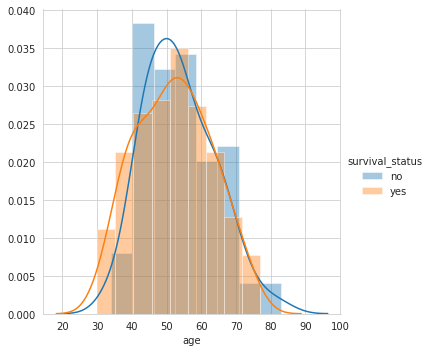

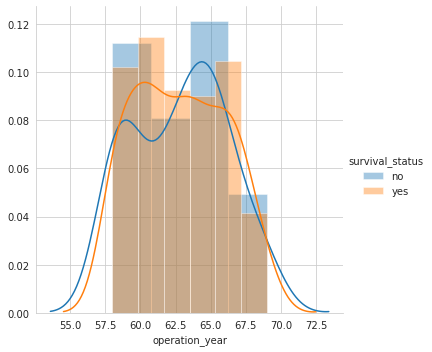

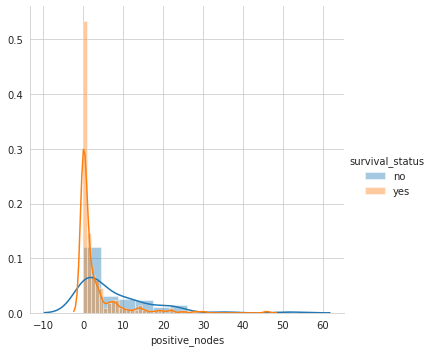

In [78]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='survival_status', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

CDF:

The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.




********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
CDF: [0.04918033 0.13770492 0.28852459 0.46229508 0.64262295 0.77704918
 0.91147541 0.9704918  0.99344262 1.        ]


********* operation_year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
CDF: [0.20655738 0.29836066 0.38360656 0.45901639 0.55737705 0.6557377
 0.74754098 0.83934426 0.92131148 1.        ]


********* positive_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
CDF: [0.7704918  0.86885246 0.92786885 0.95409836 0.98360656 0.99016393
 0.99344262 0.99344262 0.99672131 1

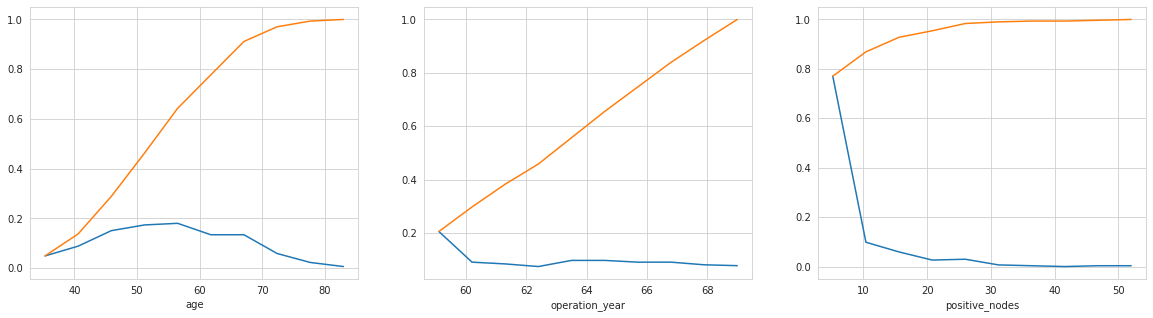

In [82]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print('\n')
    print("********* "+feature+" *********")
    
    counts, bin_edges = np.histogram(df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

Box Plots:

Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1

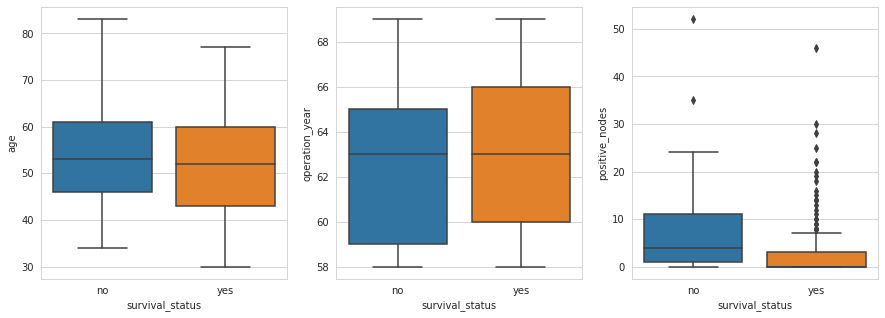

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='survival_status', y=feature, data=df, ax=axes[idx])
plt.show()  

Violin Plots:

Violin plot is the combination of box plot and probability density function.


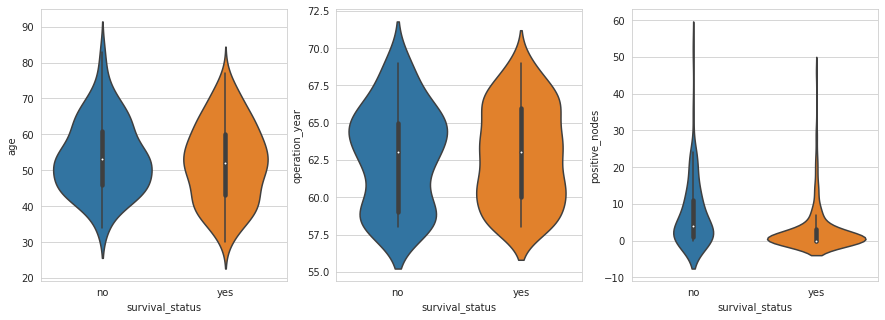

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='survival_status', y=feature, data=df, ax=axes[idx])
plt.show()

##Observations:
The number of positive lymph nodes of the survivors is highly densed from 0 to 5.

Almost 80% of the patients have less than or equal to 5 positive lymph nodes. 

The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest. 

## Multivariate Analysis

### pair plot:

Pair plot in seaborn plots the scatter plot between every two data columns in a given dataframe.
It is used to visualize the relationship between two variables

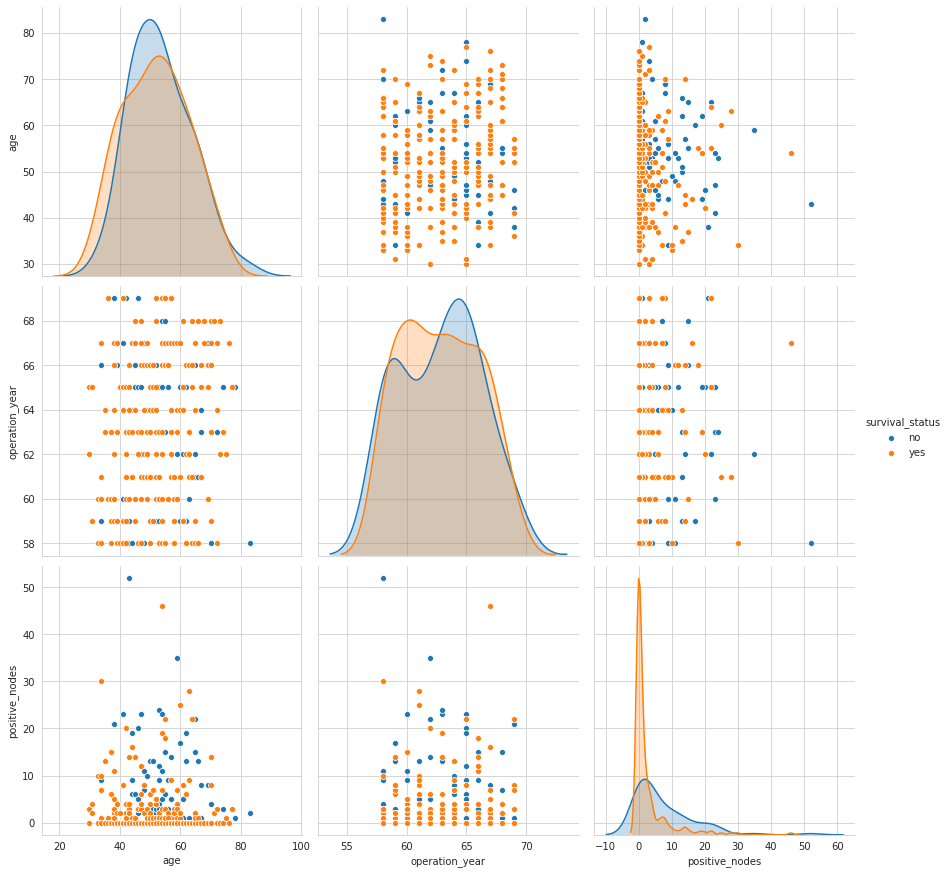

In [87]:
sns.pairplot(df, hue='survival_status', height=4)
plt.show()

## Observations:

By scattering the data points between operation_year and positive_nodes, we can see the better seperation between the two clases than other scatter plots.